[*********************100%***********************]  1 of 1 completed


(877,)
(877,)


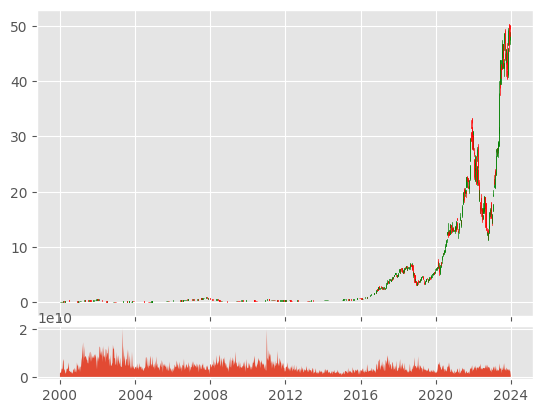

In [9]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import mpl_finance as mplf
import matplotlib.dates as mdates
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go 

style.use('ggplot')
#Importing the data
start = dt.datetime(2000,1,1)
end = dt.datetime(2023,12,31)
df = yf.download('NVDA', start, end)
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)


ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

mplf.candlestick_ohlc(ax1,df_ohlc.values, width=2 , colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values.flatten())

print(df_volume.index.map(mdates.date2num).shape)
print(df_volume.values.flatten().shape)
plt.show()

In [10]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'id':'constituents'})
    
    
    tickers=[]
    for row in table.find_all('tr')[1:]:
        ticker = row.find_all('td')[0].text
        tickers.append(ticker.replace('\n',''))
        
    
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers, f)
    
    return tickers


save_sp500_tickers()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

In [11]:
import datetime as dt
import os
import pandas
import yfinance as yf


def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('sp500tickers.pickle','rb') as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
    
    
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = yf.download(ticker,start,end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
            
        else:
            print(f'Already have {ticker}')
            
get_data_from_yahoo()

Already have MMM
Already have AOS
Already have ABT
Already have ABBV
Already have ACN
Already have ADBE
Already have AMD
Already have AES
Already have AFL
Already have A
Already have APD
Already have ABNB
Already have AKAM
Already have ALB
Already have ARE
Already have ALGN
Already have ALLE
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AMTM
Already have AEE
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have AON
Already have APA
Already have AAPL
Already have AMAT
Already have APTV
Already have ACGL
Already have ADM
Already have ANET
Already have AJG
Already have AIZ
Already have T
Already have ATO
Already have ADSK
Already have ADP
Already have AZO
Already have AVB
Already have AVY
Already have AXON
Already have BKR
Already have BALL
Already have B

In [37]:
def compile_data():
    with open("sp500tickers.pickle",'rb') as f:
        tickers = pickle.load(f)
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv(f'stock_dfs/{ticker}.csv')
        
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
        if main_df.empty:
            main_df=df
        else:
            main_df = main_df.join(df, how='outer', rsuffix=f"_{ticker}")
        
        if count % 10 ==0:
            print(count)
            
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
    
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
        Price                 MMM   Price_AOS                 AOS   Price_ABT  \
0      Ticker                 MMM      Ticker                 AOS      Ticker   
1        Date                 NaN        Date                 NaN        Date   
2  2000-01-03  19.709012985229492  2000-01-03  2.3118362426757812  2000-01-03   
3  2000-01-04  18.925884246826172  2000-01-04  2.2785251140594482  2000-01-04   
4  2000-01-05  19.474075317382812  2000-01-05   2.271862506866455  2000-01-05   

                 ABT  Price_ABBV               ABBV   Price_ACN  \
0                ABT      Ticker               ABBV      Ticker   
1                NaN        Date                NaN        Date   
2  8.288183212280273  2013-01-02  21.62917137145996  2001-07-19   
3  8.051374435424805  2013-01-03  21.45058250427246 

In [ ]:
with open("sp500tickers.pickle",'rb') as f:
        tickers = pickle.load(f)
main_df = pd.DataFrame()

df = pd.read_csv('stock_dfs/AAPL.csv')
df.columns = ['Date','Price', 'Open', 'High', 'Low', 'Close', 'Volume']


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
